In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

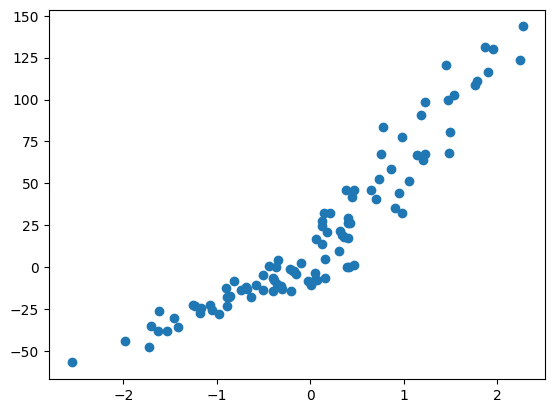

In [2]:
np.random.seed(0) # permet de reproduire l'aléatoire

x, y = make_regression(n_samples=100, n_features=1, noise = 10) # creation d'un dataset (x, y) linéaire
y = y + abs(y/2) # modifie les valeurs de y pour rendre le dataset non-linéaire

plt.scatter(x, y) # afficher les résultats. x en abscisse et y en ordonnée

In [3]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [4]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) # ajoute le vecteur x^2 a la gauche de la matrice X

print(X.shape)
print(X[:10])

(100, 3)
[[ 0.12927848 -0.35955316  1.        ]
 [ 0.95382381  0.97663904  1.        ]
 [ 0.1618788   0.40234164  1.        ]
 [ 0.66120688 -0.81314628  1.        ]
 [ 0.78816353 -0.88778575  1.        ]
 [ 0.19701457  0.44386323  1.        ]
 [ 0.95507205 -0.97727788  1.        ]
 [ 0.18346819  0.42833187  1.        ]
 [ 0.04337847  0.20827498  1.        ]
 [ 0.09706498 -0.31155253  1.        ]]


In [5]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-0.63743703],
       [-0.39727181],
       [-0.13288058]])

In [6]:
# Modèle Linéaire
def model(X, theta):
    return X.dot(theta)

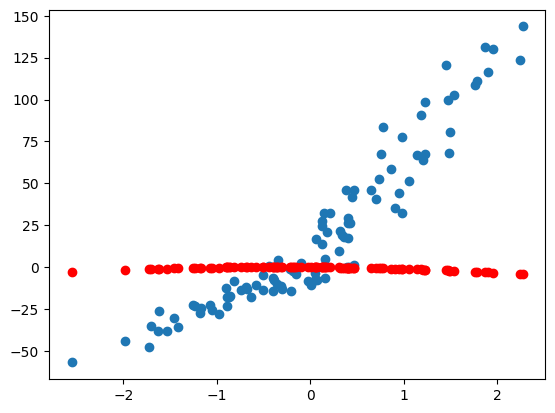

In [7]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r')

In [8]:
#MSE
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X, y, theta) #Calcule le coût (erreur quadratique moyenne) entre les prédictions du modèle et les valeurs réelles y.

1328.6654828872622

In [10]:
#Gradients et Descente de Gradient
def grad(X, y, theta): #Calcule le gradient de la fonction de coût par rapport aux paramètres theta.
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) #Met à jour les paramètres theta en utilisant l'algorithme de descente de gradient et enregistre l'évolution du coût au fil des itérations.

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [12]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [13]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[ 8.60077615],
       [42.23116732],
       [ 8.18143081]])

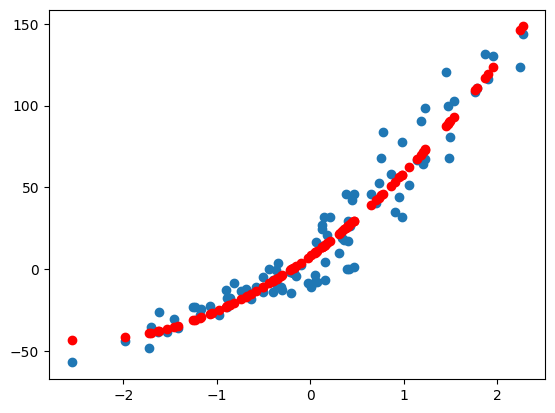

In [14]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')

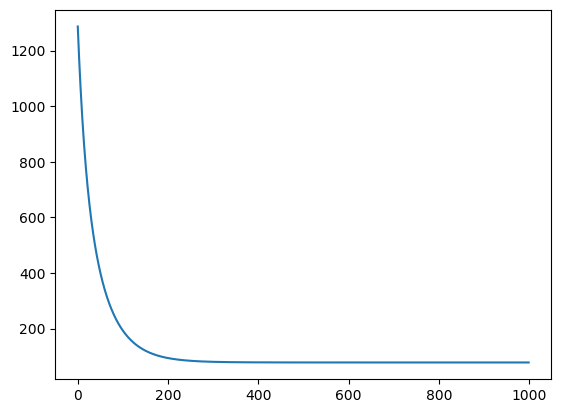

In [15]:
plt.plot(range(n_iterations), cost_history)

In [16]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum())
    return 1 - u/v

In [17]:
coef_determination(y, predictions)

0.9287186469389942

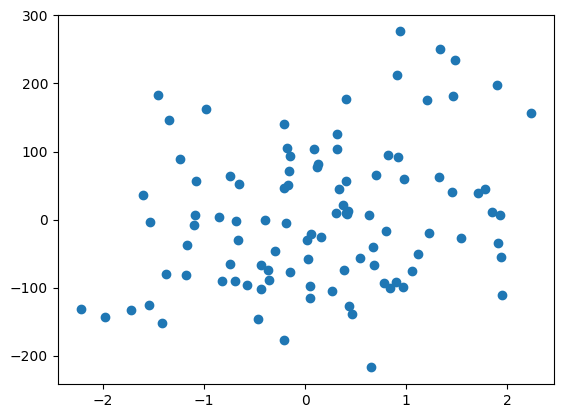

In [18]:

#Régression Multiples Variables
np.random.seed(0) # permet de reproduire l'aléatoire

x, y = make_regression(n_samples=100, n_features=2, noise = 10) # creation d'un dataset (x, y) linéaire

plt.scatter(x[:,0], y) # afficher les résultats. x_1 en abscisse et y en ordonnée

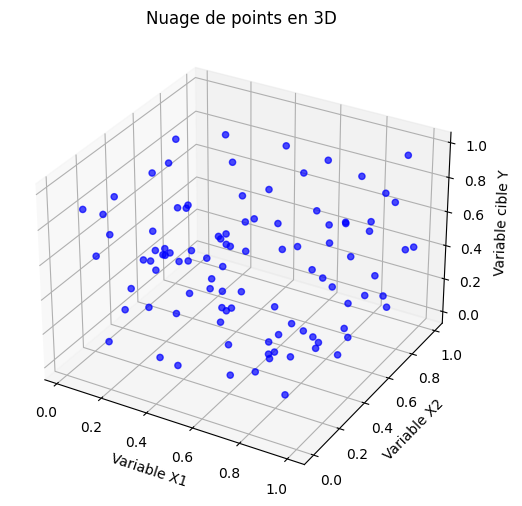

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Exemple de données
x = np.random.rand(100, 2)  # Deux variables explicatives
y = np.random.rand(100)     # Variable cible

# Créer une figure 3D
fig = plt.figure(figsize=(8, 6))  # Initialiser la figure
ax = fig.add_subplot(111, projection='3d')  # Ajouter un graphique 3D

# Afficher les points 3D
ax.scatter(x[:, 0], x[:, 1], y, c='b', marker='o', alpha=0.7)

# Ajouter les noms des axes
ax.set_xlabel("Variable X1")
ax.set_ylabel("Variable X2")
ax.set_zlabel("Variable cible Y")
ax.set_title("Nuage de points en 3D")

# Afficher le graphique
plt.show()


In [21]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [22]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

print(X.shape)
print(X[:10])

(100, 3)
[[0.74878826 0.23780724 1.        ]
 [0.1718531  0.44929165 1.        ]
 [0.30446841 0.83918912 1.        ]
 [0.23774183 0.50238946 1.        ]
 [0.9425836  0.6339977  1.        ]
 [0.86728941 0.94020969 1.        ]
 [0.75076486 0.69957506 1.        ]
 [0.96796557 0.99440079 1.        ]
 [0.45182168 0.07086978 1.        ]
 [0.29279403 0.15235471 1.        ]]


In [23]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[ 0.79570616],
       [-0.34258453],
       [ 0.36846691]])

In [24]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [25]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[ 0.323874  ],
       [-0.18403251],
       [ 0.36811689]])

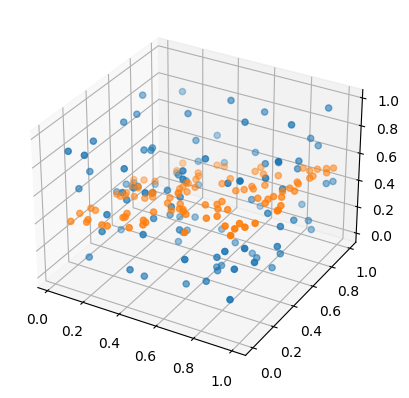

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

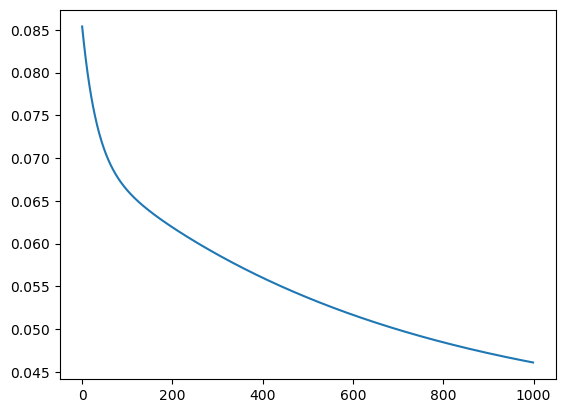

In [27]:
plt.plot(range(n_iterations), cost_history)

In [28]:
coef_determination(y, predictions)

-0.16833287953907372

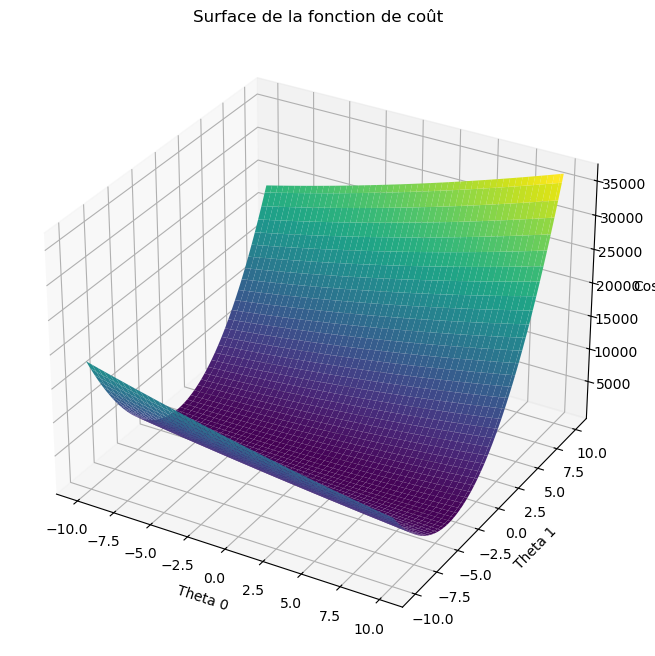

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Génération d'un dataset polynomiale
np.random.seed(0)
m = 100
X = 2 - 3 * np.random.normal(0, 1, m)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, m)

# Ajout d'un biais et d'un terme quadratique
X = X[:, np.newaxis]
X_poly = np.hstack((X**2, X, np.ones((X.shape[0], 1))))

# Fonction de modélisation
def model(X, theta):
    return X.dot(theta)

# Fonction de coût (MSE - Mean Squared Error)
def cost_function(X, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum((model(X, theta) - y) ** 2)

# Initialisation des paramètres
theta_0_vals = np.linspace(-10, 10, 100)
theta_1_vals = np.linspace(-10, 10, 100)
cost_vals = np.zeros((len(theta_0_vals), len(theta_1_vals)))

# Calcul de la fonction de coût pour chaque combinaison de theta_0 et theta_1
for i in range(len(theta_0_vals)):
    for j in range(len(theta_1_vals)):
        theta = np.array([theta_0_vals[i], theta_1_vals[j], 0])  # On fixe theta_2 à 0 pour simplifier
        cost_vals[i, j] = cost_function(X_poly, y, theta)

# Plot de la fonction de coût
theta_0, theta_1 = np.meshgrid(theta_0_vals, theta_1_vals)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0, theta_1, cost_vals, cmap='viridis')

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')
ax.set_title('Surface de la fonction de coût')

plt.show()